

---


Возьмём холодную часть как Мурнагана (1) и Бёрча-Мурнагана 3-го порядка (2) и Роуза-Вине (3)

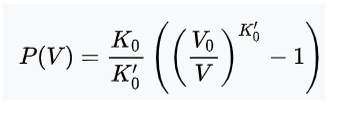
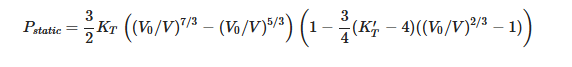
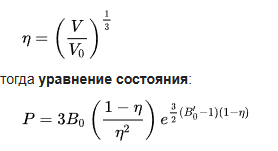

C:\Temp\ipykernel_4868\843379420.py:43: RuntimeWarning: invalid value encountered in divide
  return np.where(x != 0, x**3 / (np.exp(x) - 1), 0)


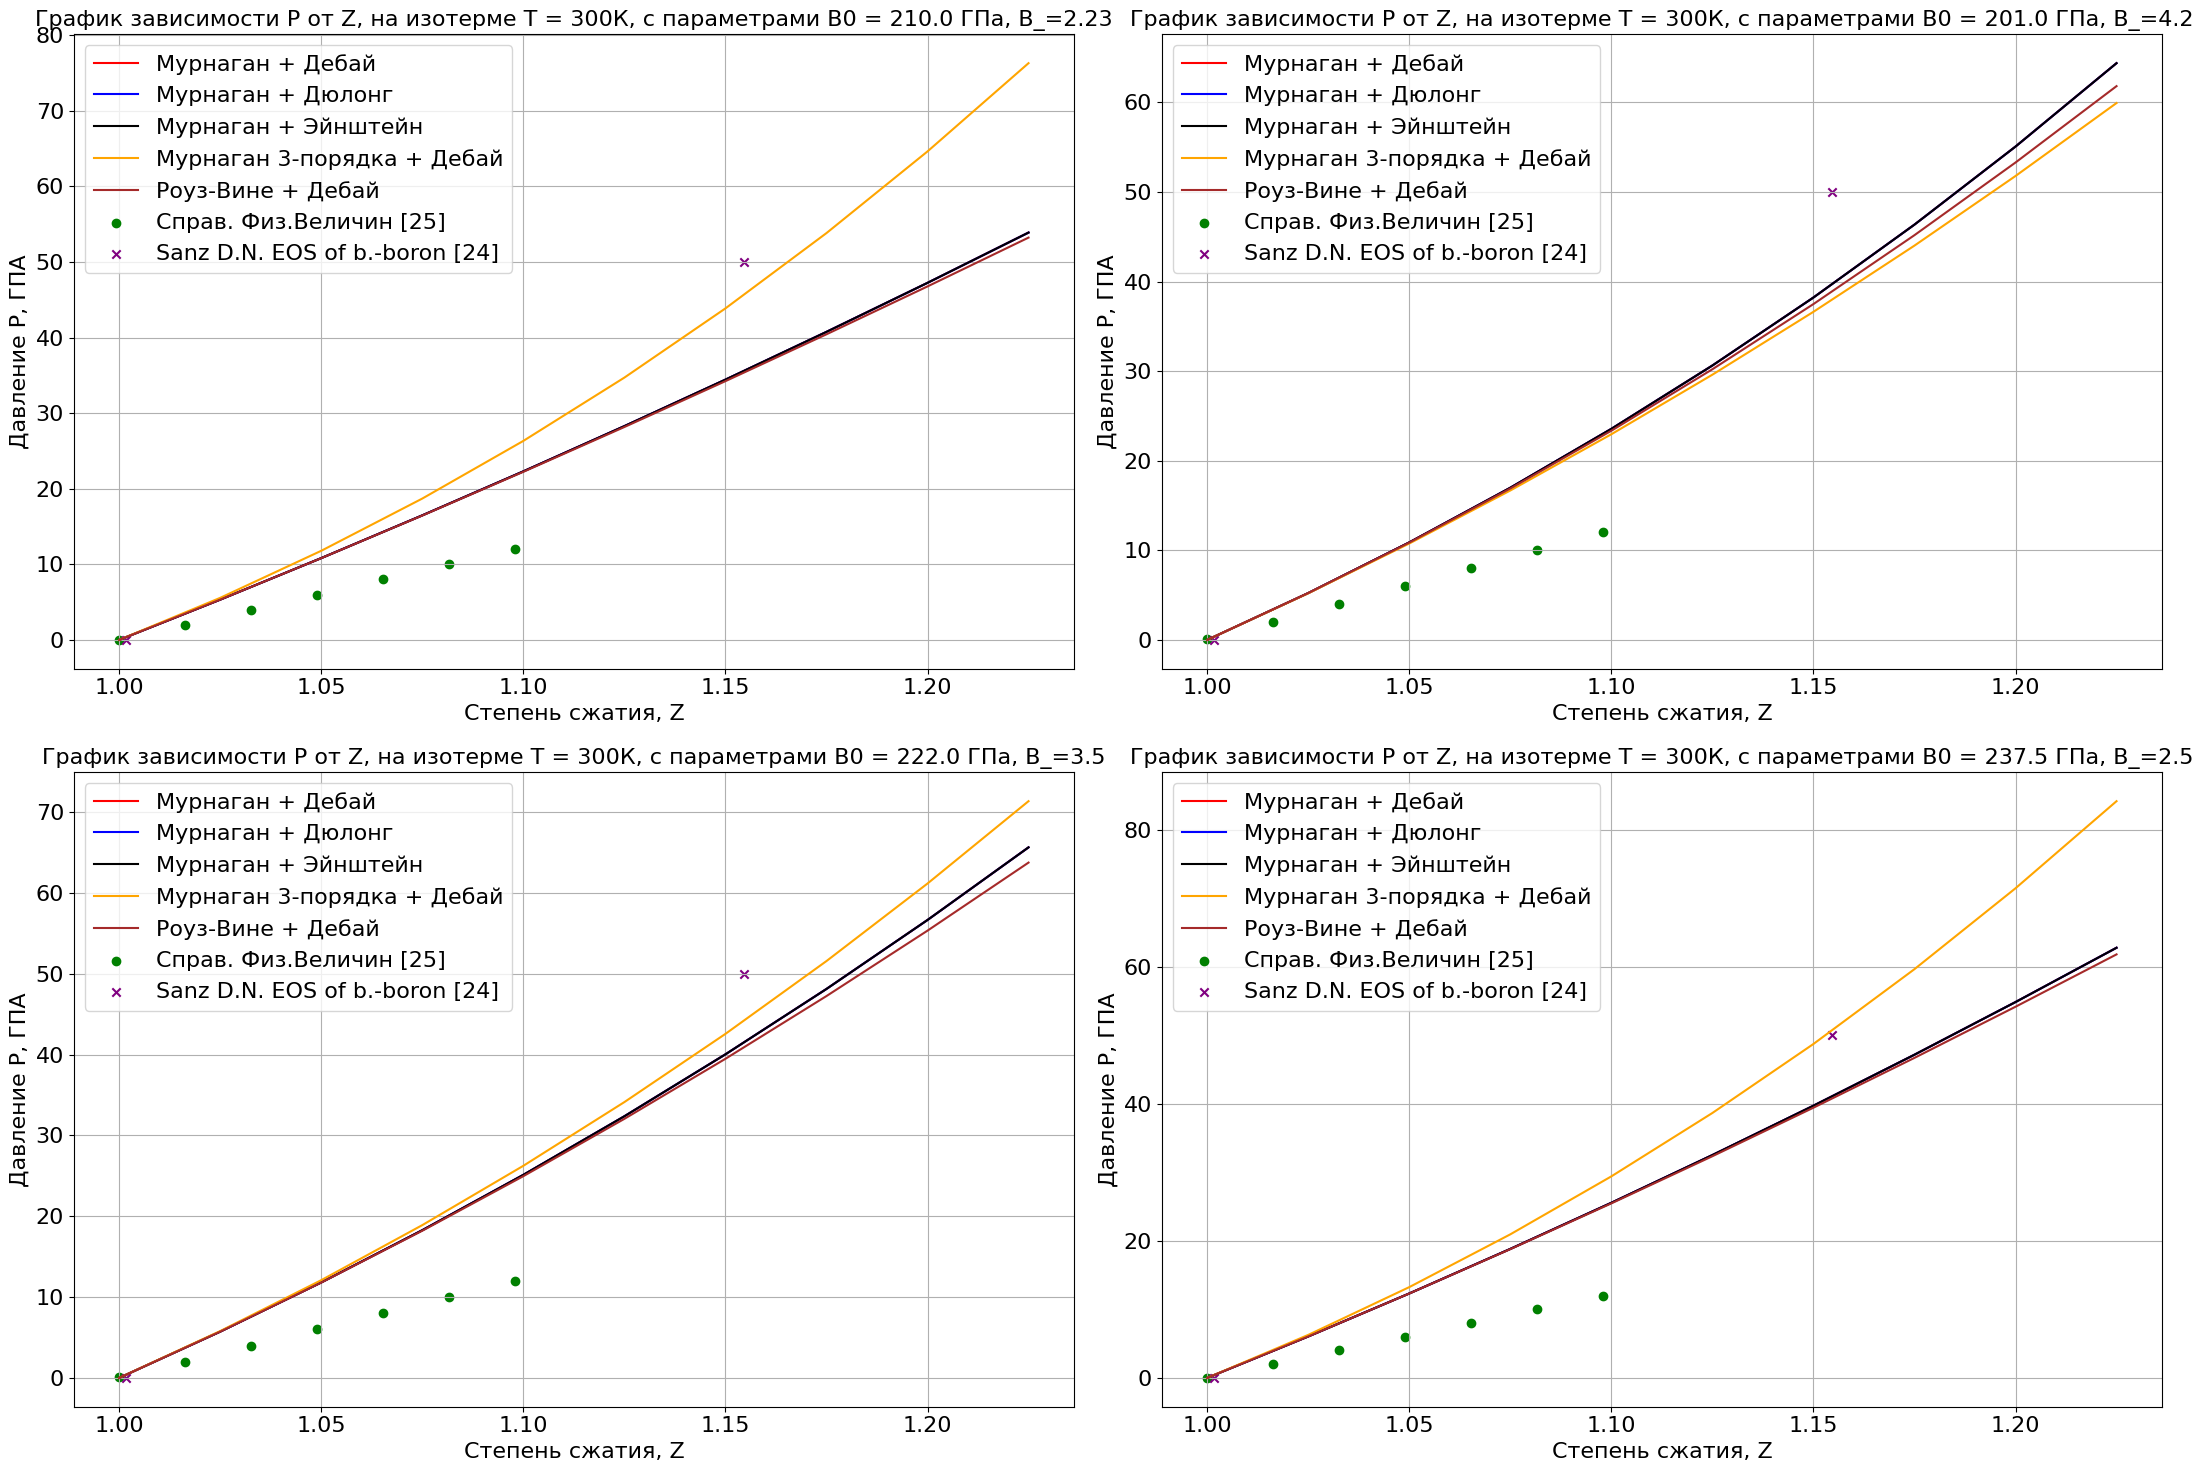

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib

#sns.set_theme()
plt.figure(figsize=(22, 15))
matplotlib.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16
})

class PhysicsConstant:
    """This class defines Physical Constant used in this task"""
    teta = 1250
    R = 8.31
    gamma = 1.67
    h_ = 6.625 * 10**(-34) # Дж*c Постоянная планка
    kb = 1.38 * 10**(-23) # Дж/K Постоянная Больцмана
    omega = 10**(13) # Рад/c ОЦЕНОЧНОЕ ЧИСЛО

class P_value:
    """"This class required to calculate <Cold> component of Pressure"""

    def __init__(self, T, K, K_, place):
        self.T = T
        self.U_Debye = self.calc_U_Debye()
        self.U_Einst = self.calc_U_Einst()
        self.K = K * 10**(9)
        self.K_ = K_
        self.place = place

        self.z = np.arange(1.0, 1.25, 0.025)
        self.V = np.linspace(2.34, 2.808, 10)

    @staticmethod
    def func(x):
        return np.where(x != 0, x**3 / (np.exp(x) - 1), 0)

    def calc_U_Debye(self):
        ot = self.T / PhysicsConstant.teta
        d = 1 / ot
        m = 500
        c = 0
        h = (d - c) / (2 * m)
        x = c + h * np.arange(0, 2 * m + 1)
        y = self.func(x)
        integral = h / 3 * (4 * np.sum(y[1::2]) + 2 * np.sum(y[2:2*m-1:2]) + y[0] + y[-1])
        return 9 * PhysicsConstant.R * self.T * ot**3 * integral

    def calc_U_Einst(self):
        return 3 * PhysicsConstant.R * PhysicsConstant.teta / (math.exp(PhysicsConstant.teta / self.T) - 1)

    def P_Debay(self):
        return self.K / self.K_ * ((self.z)**(self.K_) - 1) + self.U_Debye * PhysicsConstant.gamma / self.V

    def P_Dulong(self):
        return self.K / self.K_ * ((self.z)**(self.K_) - 1) + 3 * PhysicsConstant.R * self.T * PhysicsConstant.gamma / self.V

    def P_Einst(self):
        return self.K / self.K_ * ((self.z)**(self.K_) - 1) + self.U_Einst * PhysicsConstant.gamma / self.V

    def P_Murn3(self):
        return 3 / 2 * self.K * ((self.z)**(7 / 3) - (self.z)**(5 / 3)) * (1 - 3 / 4 * (self.K_ - 4) * ((self.z)**(2 / 3) - 1)) + self.U_Debye * PhysicsConstant.gamma / self.V

    def P_Vine(self):
        eta = (1 / self.z)**(1 / 3)
        return 3 * self.K * (1 - eta) / (eta**2) * np.exp(3 / 2 * (self.K_ - 1) * (1 - eta)) + self.U_Debye * PhysicsConstant.gamma / self.V

    def plot(self):
        P_deb = self.P_Debay()
        P_dul = self.P_Dulong()
        P_Ein = self.P_Einst()
        P_Mur = self.P_Murn3()
        P_vine = self.P_Vine()

        plt.subplot(2, 2, self.place)
        plt.plot(self.z, P_deb / 10**9, label='Мурнаган + Дебай', color='red')
        plt.plot(self.z, P_dul / 10**9, label='Мурнаган + Дюлонг', color='blue')
        plt.plot(self.z, P_Ein / 10**9, label='Мурнаган + Эйнштейн', color='black')
        plt.plot(self.z, P_Mur / 10**9, label='Мурнаган 3-порядка + Дебай', color='orange')
        plt.plot(self.z, P_vine / 10**9, label="Роуз-Вине + Дебай", color="brown")

        P_phys = [0.05, 2, 4, 6, 8, 10, 12]
        plt.scatter(np.linspace(1.0, 1.098, len(P_phys)), P_phys, color='green', label='Справ. Физ.Величин [25]', marker='o')
        plt.grid(True)
        P_sans = [0, 50]
        V_sans = [1.001724234, 1.154487179]
        plt.scatter(V_sans, P_sans, color='purple', label='Sanz D.N. EOS of b.-boron [24]', marker='x')
        plt.title(f'График зависимости P от Z, на изотерме T = {self.T}К, с параметрами B0 = {self.K/10**9} ГПа, B_={self.K_}')
        plt.xlabel('Степень сжатия, Z')
        plt.ylabel('Давление P, ГПА')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'{self.T}2.png')


P_300 = P_value(300, K=210, K_=2.23, place=1)
P_300.plot()
P_300_params2 = P_value(300, K=201, K_= 4.2, place=2)
P_300_params2.plot()
P_300_params3 = P_value(300, K=222, K_= 3.5, place=3)
P_300_params3.plot()
P_300_params4 = P_value(300, K=237.5, K_=2.5, place=4)
P_300_params4.plot()

---
#КАЛЛОРИКА


C:\Temp\ipykernel_4868\1599215765.py:27: RuntimeWarning: invalid value encountered in divide
  return np.where(x!=0, x**4*np.exp(x)/(np.exp(x)-1)**2, 0)


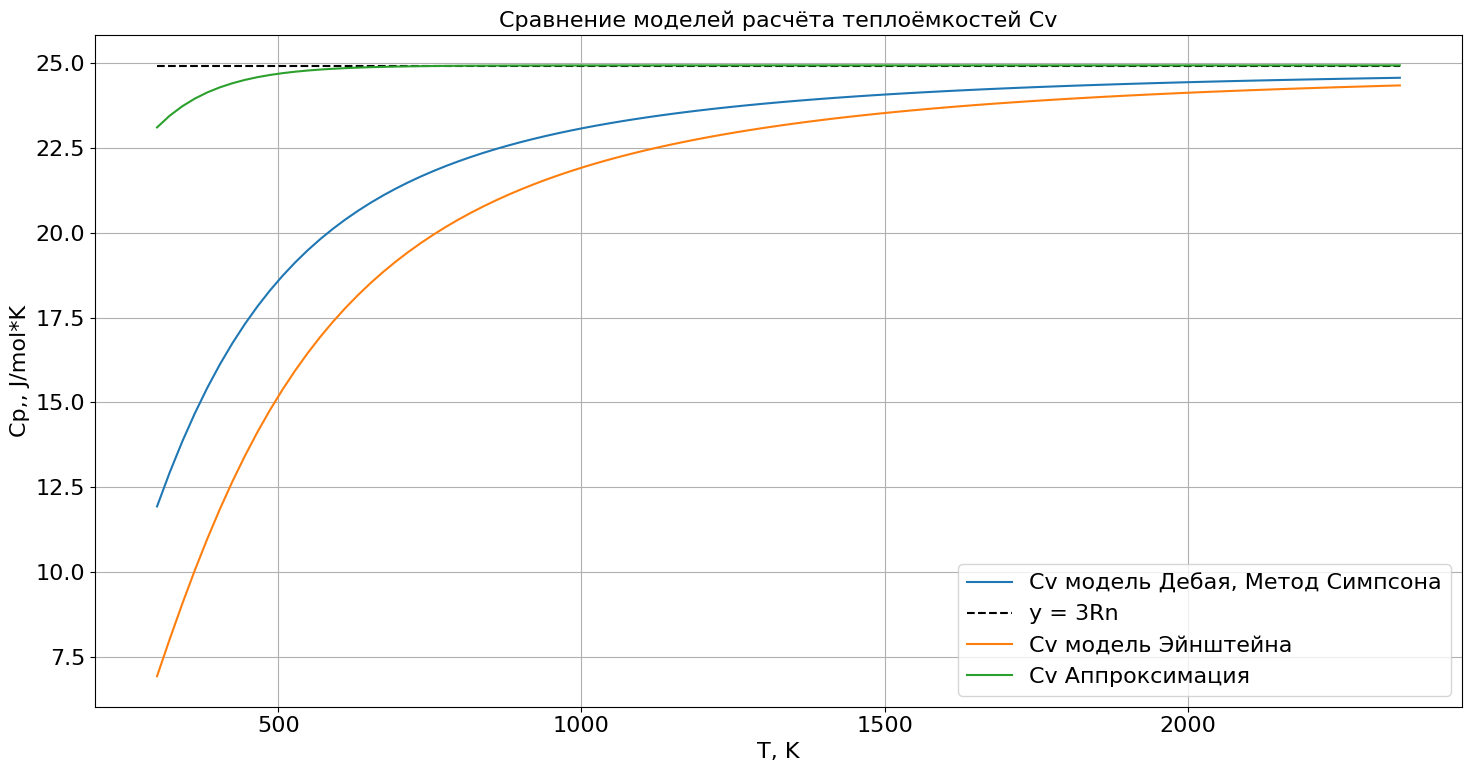

In [20]:
matplotlib.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16
})

class PhysicsConstant:
    """This class defines Physical Constant used in this task"""
    teta = 1250
    R = 8.31
    gamma = 1.67 #2
    h_ = 6.625 * 10**(-34) # Дж*c Постоянная планка
    kb = 1.38 * 10**(-23) # Дж/K Постоянная Больцмана
    omega = 10**(13) # Рад/c ОЦЕНОЧНОЕ ЧИСЛО
    
class CompareCalloricalProperties:
    """This class required to compare different models which calculate Heat Capacity"""

    def __init__(self):
        self.t = np.linspace(300, 2350, 100)

    @staticmethod
    def func(x):
        return np.where(x!=0, x**4*np.exp(x)/(np.exp(x)-1)**2, 0)
    
    
    def Debay_Heat_Capacity(self):
        Cv_Debay = []
        m = 50
        c = 0
        for t in self.t:
            z= t / PhysicsConstant.teta
            d=1/z
            h=(d-c)/2/m
            x=c+h*np.arange(0, 2*m)
            y=self.func(x)
            integral=h/3*(4*np.sum(y[1::2])+2*np.sum(y[2:2*m-1:2])+y[0]+y[-1])
            Cv_Debay.append(9 * PhysicsConstant.R * z**3 * integral)
        Cv_Debay = np.array(Cv_Debay)
        return Cv_Debay
    
    def Einstein_Heat_capacity(self):
        Cp_Einst = []
        for T in self.t:
            Cp_Einst.append(3 * PhysicsConstant.R * (PhysicsConstant.teta/T)**(2) * math.exp(PhysicsConstant.teta/T)/(math.exp(PhysicsConstant.teta/T) - 1)**2)
        return Cp_Einst

    def Polinomial_eq_nist(self):
        Cp_nist = []
        for t in self.t:
            if t <= 1800:
                Cp_nist.append(10.18574 + 29.24415 * (t*0.001) - 18.02137 * (t*0.001)**2 + 4.212326 * (t*0.001)**3 - 0.550999 / (t*0.001)**2)
            if t >= 1801 and t <= 2350:
                Cp_nist.append(25.12664 + 1.975493 * (t*0.001) + 0.338395 * (t*0.001)**2 - 0.040032 *(t*0.001)**3 - 2.635578 / (t*0.001)**2)
        Cp_nist = np.array(Cp_nist)
        return Cp_nist

    def Approximation_exp_data(self):
        approx_values = []
        for T in self.t:
            approx_values.append(24.942 * (1 - (math.exp(-(T - 199.90)/99.82))/5))
        return approx_values


    def plot_data(self):
        assipt = np.linspace(300, 2350, 100)
        y_asymptote = 24.93 * np.ones_like(assipt)
        plt.figure(figsize=(15, 8))
        plt.grid(True)
        plt.plot(self.t, self.Debay_Heat_Capacity(), label='Сv модель Дебая, Метод Симпсона')
        #plt.plot(self.t, self.Polinomial_eq_nist(), label='Cp Нист')
        plt.plot(assipt, y_asymptote, 'k--', label='y = 3Rn')
        plt.plot(self.t, self.Einstein_Heat_capacity(), label='Cv модель Эйнштейна')
        plt.plot(self.t, self.Approximation_exp_data(), label="Cv Аппроксимация")
        plt.legend()
        plt.xlabel('T, K')
        plt.ylabel('Cp,, J/mol*K')
        plt.title('Сравнение моделей расчёта теплоёмкостей Cv')
        plt.tight_layout()
        #plt.savefig('Cv.png')

compare_1 = CompareCalloricalProperties()
compare_1.plot_data()


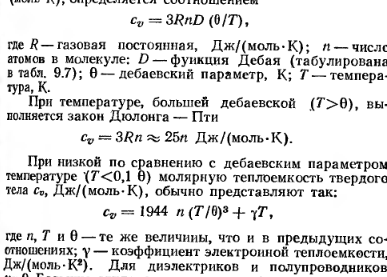
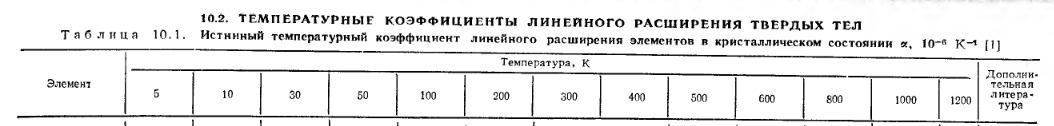


---
АПРОКСИМАЦИЯ ТЕПЛОЁМКОСТИ НЕЛИНЕЙНОЙ РЕГРЕССИЕЙ И ГРАДЕНТНЫМ СПУСКОМ

---




Оптимальные параметры: A = 199.89971256078152 , B = 99.82074453935239
Коэффициент детерминации R² = 0.9975


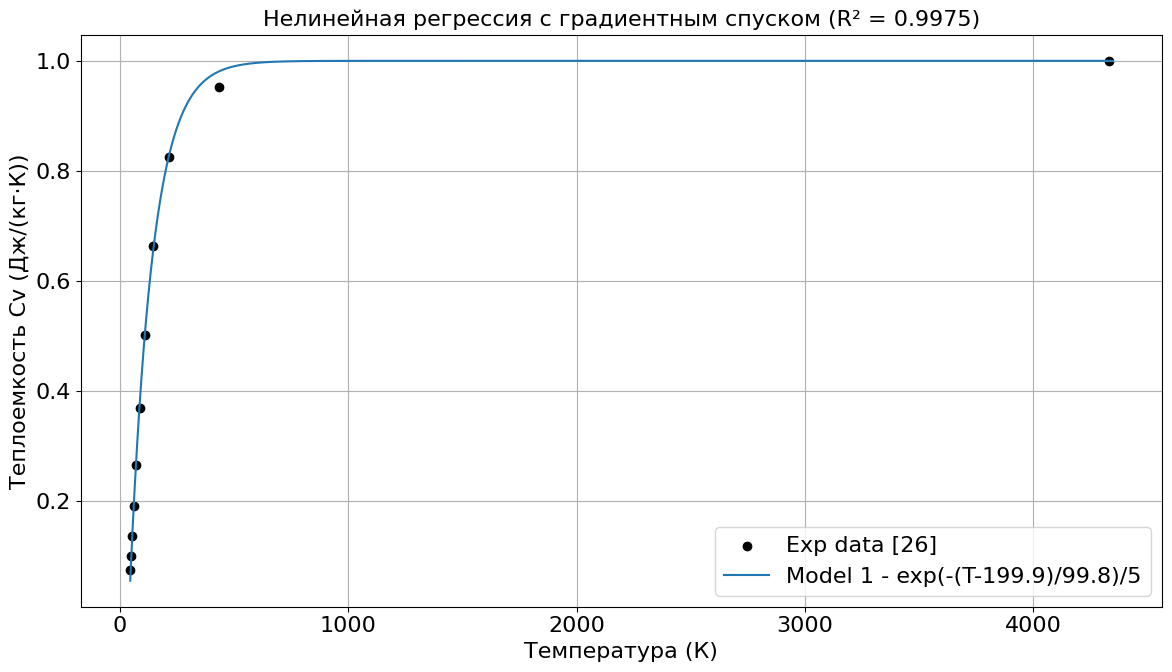

In [21]:
import numpy as np
import matplotlib.pyplot as plt

class GradientDescentNonlinearRegression:
    def __init__(self, learning_rate=0.015, iterations=150000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.X = np.array([])
        self.Y = np.array([])
        self.A = 0
        self.B = 0

    def plot_data(self):
        plt.figure(figsize=(12,7))

        plot_data = []
        for T in range(45, 4350):
            plot_data.append(1 - np.exp(-(T - self.A) / self.B) / 5)

        #plt.style.use('fivethirtyeight')
        plt.scatter(self.X, self.Y, color='black', label='Exp data [26]')
        plt.plot(range(45, 4350), plot_data, label=f"Model 1 - exp(-(T-{self.A:.1f})/{self.B:.1f})/5")
        plt.xlabel('Температура (К)')
        plt.ylabel('Теплоемкость Cv (Дж/(кг·К))')
        r2_score = self.calculate_r2()
        plt.title(f'Нелинейная регрессия с градиентным спуском (R² = {r2_score:.4f})')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        #plt.savefig('descent.png')

    def save_data(self):
        np.savez('FirstDataSet.npz', array1=self.X, array2=self.Y)

    def generate_data(self):
        self.X = np.array([4330.0, 433.0, 216.5, 144.3, 108.3, 86.6, 72.2, 61.9, 54.1, 48.1, 43.3])       # Температура в К
        self.Y = np.array([1, 0.952, 0.825, 0.663, 0.503, 0.369, 0.266, 0.191, 0.138, 0.101, 0.076])
             # Экспериментальная теплоёмкость в Дж/(кг·К)
    def calculate_r2(self):
            y_pred = self.predict()
            ss_total = np.sum((self.Y - np.mean(self.Y)) ** 2)
            ss_residual = np.sum((self.Y - y_pred) ** 2)
            r2 = 1 - (ss_residual / ss_total)
            return r2
    
    def fit(self):
        self.A = 200
        self.B = 100
        n = self.X.shape[0]

        for _ in range(self.iterations):
            A_gradient = -2 * np.sum((self.Y - (1 - np.exp(-(self.X - self.A) / self.B) / 5)) * (-np.exp(-(self.X - self.A) / self.B) / (5 * self.B))) / n
            B_gradient = -2 * np.sum((self.Y - (1 - np.exp(-(self.X - self.A) / self.B) / 5)) * ((self.X - self.A) * np.exp(-(self.X - self.A) / self.B) / (5 * self.B**2))) / n

            self.A -= self.learning_rate * A_gradient
            self.B -= self.learning_rate * B_gradient

        r2_score = self.calculate_r2()
        print("Оптимальные параметры: A =", self.A, ", B =", self.B)
        print(f"Коэффициент детерминации R² = {r2_score:.4f}")

    def predict(self):
        return (1 - np.exp(-(self.X - self.A) / self.B) / 5)

clf = GradientDescentNonlinearRegression()
clf.generate_data()
clf.fit()
clf.plot_data()


<>:18: SyntaxWarning: invalid escape sequence '\G'
<>:18: SyntaxWarning: invalid escape sequence '\G'
C:\Temp\ipykernel_4868\3200172896.py:18: SyntaxWarning: invalid escape sequence '\G'
  self.boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")


<Figure size 2000x1500 with 0 Axes>

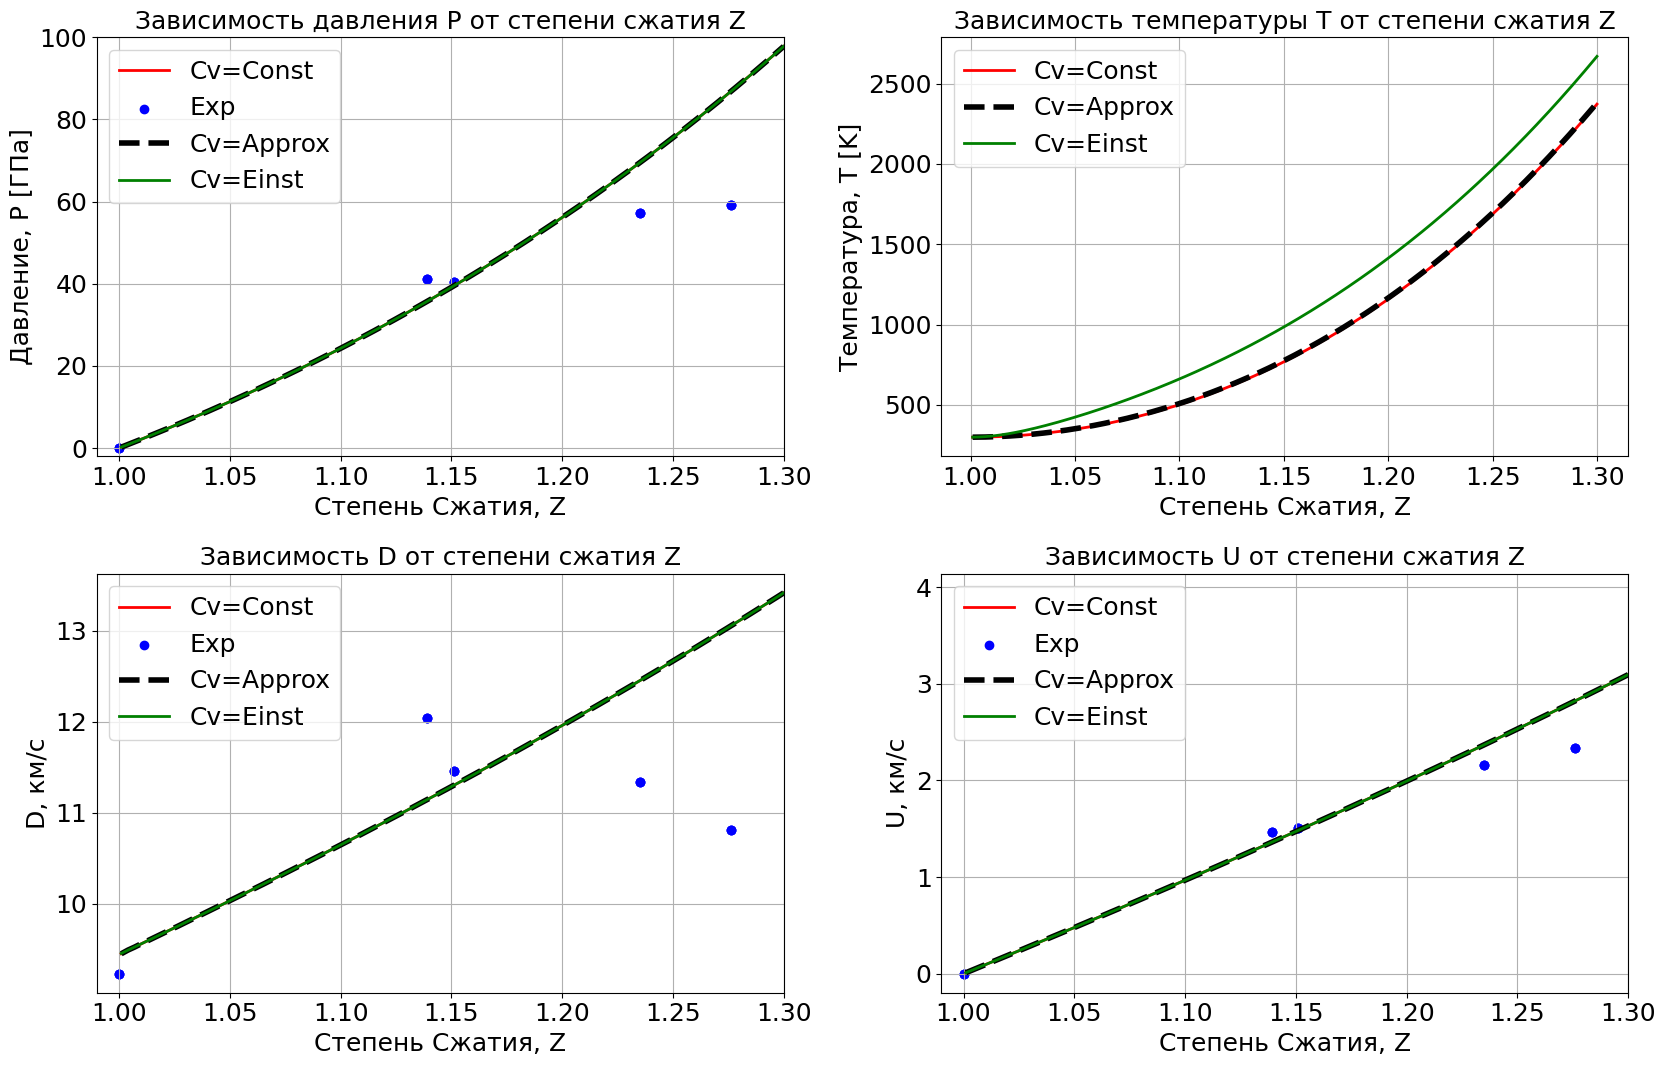

In [22]:
plt.figure(figsize=(20, 15))
matplotlib.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18
})
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import pandas as pd

class BoronModel:
    def __init__(self):
        self.boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")
        self.V1 = 4.59 / 1000  # литры
        self.P1 = 100  # кПа
        self.m = 10.81 / 1000  # кг/моль
        self.K = 210 * 10**9  # Па
        self.K_ = 2.23
        self.gamma = 1.67
        self.T1 = 298.15  # K

    def PdV(self, T, Z):
        V2 = self.V1 / Z
        return 0.5 * (self.V1 - V2) * (self.P2(T, Z) + self.P1)

    def P2(self, T, Z):
        eta = (1 / Z) ** (1 / 3)
        V0_m3_mol = self.V1 / 1000.0
        V2_m3_mol = V0_m3_mol / Z

        P_cold = 3 * self.K * (1 - eta) / (eta**2) * np.exp(1.5 * (self.K_ - 1) * (1 - eta))
        E_thermal_integral = self.calc_E_thermal(T, Z)
        P_thermal = self.gamma / V2_m3_mol * E_thermal_integral
        P_total_Pa = P_cold + P_thermal
        return (P_total_Pa / 1000.0) + self.P1  # кПа

    def Ecold(self, Z):
        eta = (1 / Z) ** (1 / 3)
        exp_arg = 1.5 * (self.K_ - 1) * (1 - eta)
        exp_val = np.exp(exp_arg)
        coeff = (9 * self.K * (self.V1 / 1000000.0)) / (self.K_ - 1)**2
        energy_term = 1.0 - (1.0 - exp_arg) * exp_val
        return coeff * energy_term

    def calc_E_thermal(self, T, Z):
        raise NotImplementedError("This method should be implemented in child classes.")

    def dE(self, T, Z):
        return self.Ecold(Z) + self.calc_E_thermal(T, Z)

    def func(self, T, Z):
        return self.dE(T, Z) - self.PdV(T, Z)

    def res(self, Z, diff=0.1):
        left, right = 298.0, 8000.0
        f_left, f_right = self.func(left, Z), self.func(right, Z)

        for _ in range(100):
            mid = (left + right) / 2
            if mid == left or mid == right or (right - left) < diff:
                break
            f_mid = self.func(mid, Z)
            if abs(f_mid) < 1e-7:
                return mid
            if f_mid * f_left < 0:
                right = mid
            else:
                left = mid
                f_left = f_mid
        return (left + right) / 2

    def run_simulation(self, Z_range=np.arange(1.001, 1.3, 0.001)):
        T_values, Z_values, P2_values, D_values, U_values = [], [], [], [], []

        for Z in Z_range:
            T2 = self.res(Z)
            if np.isnan(T2):
                continue

            current_P2_kPa = self.P2(T2, Z)
            P2_minus_P1_kPa = current_P2_kPa - self.P1
            term_for_DU = (P2_minus_P1_kPa * 1000.0) * (self.V1 / 1000.0 / self.m) / (1.0 - 1.0 / Z)
            D_val = np.sqrt(term_for_DU) / 1000.0
            U_val = (Z - 1.0) / Z * D_val

            T_values.append(T2)
            Z_values.append(Z)
            P2_values.append(current_P2_kPa / 1000000.0)
            D_values.append(D_val)
            U_values.append(U_val)

        return Z_values, P2_values, D_values, U_values, T_values

class ConstCv(BoronModel):
    def calc_E_thermal(self, T, Z):
        Cv = 24.93
        return Cv * (T - self.T1)

class ApproxCv(BoronModel):
    def approx(self, T):
        return 24.93 * (1 - (math.exp(-(T - 199.90) / 99.825)) / 5)

    def calc_E_thermal(self, T, Z):
        return integrate.quad(self.approx, self.T1, T)[0]

class EinstCv(BoronModel):
    def calc_CvEinst(self, T):
        R = 8.31
        teta = 1250
        return (3 * R * (teta / T)**2 * math.exp(teta / T) / (math.exp(teta / T) - 1)**2)

    def calc_E_thermal(self, T, Z):
        return integrate.quad(self.calc_CvEinst, self.T1, T)[0]

def plot_all_results(models, labels, Z_range=np.arange(1.001, 1.3, 0.001)):
    plt.figure(figsize=(17, 11))

    line_styles = [
        {"color": "red", "linewidth": 2, "linestyle": "-", "label": "Cv=Const"},
        {"color": "black", "linewidth": 4, "linestyle": "--", "label": "Cv=Approx"},
        {"color": "green", "linewidth": 2, "linestyle": "-", "label": "Cv=Einst"}
    ]

    for model, style in zip(models, line_styles):
        Z_values, P2_values, D_values, U_values, T_values = model.run_simulation(Z_range)
        
        plt.subplot(2, 2, 1)
        plt.plot(Z_values, P2_values, **style)
        plt.scatter(model.boron_data["R/R0"], model.boron_data["P"], label="Exp" if style == line_styles[0] else None, color="blue")
        plt.grid(True)
        plt.legend()
        plt.ylim(-2, 100)
        plt.xlim(0.99, 1.3)
        plt.title("Зависимость давления P от степени сжатия Z")
        plt.xlabel('Степень Сжатия, Z')
        plt.ylabel('Давление, P [ГПа]')
        
        plt.subplot(2, 2, 2)
        plt.plot(Z_values, T_values, **style)
        plt.grid(True)
        plt.legend()
        plt.title("Зависимость температуры T от степени сжатия Z")
        plt.xlabel('Степень Сжатия, Z')
        plt.ylabel('Температура, T [K]')
        
        plt.subplot(2, 2, 3)
        plt.plot(Z_values, D_values, **style)
        plt.scatter(model.boron_data["R/R0"], model.boron_data["D"], label="Exp" if style == line_styles[0] else None, color="blue")
        plt.grid(True)
        plt.legend()
        plt.xlim(0.99, 1.3)
        plt.title("Зависимость D от степени сжатия Z")
        plt.xlabel('Степень Сжатия, Z')
        plt.ylabel('D, км/с')
        
        plt.subplot(2, 2, 4)
        plt.plot(Z_values, U_values, **style)
        plt.scatter(model.boron_data["R/R0"], model.boron_data["U"], label="Exp" if style == line_styles[0] else None, color="blue")
        plt.grid(True)
        plt.legend()
        plt.xlim(0.99, 1.3)
        plt.title("Зависимость U от степени сжатия Z")
        plt.xlabel('Степень Сжатия, Z')
        plt.ylabel('U, км/с')
        """
        #plt.subplot(2, 2, 4)
        plt.plot(U_values, D_values, **style)
        plt.scatter(model.boron_data["U"], model.boron_data["D"], label="Exp" if style == line_styles[0] else None, color="blue")
        plt.grid(True)
        plt.legend()
        plt.title("Зависимость Волновой скорости от массовой D(U)")
        plt.xlabel('Массовая скорость U, км/с')
        plt.ylabel('Волновая скорость D, км/с')
        plt.xlim(0, 3)
        """
    plt.tight_layout()
    #plt.savefig("UAres")
    plt.show()

if __name__ == "__main__":
    models = [ConstCv(), ApproxCv(), EinstCv()]
    labels = ["Cv=Const", "Cv=Approx", "Cv=Einst"]
    plot_all_results(models,labels)